In [62]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()  # Reuses the existing session

In [63]:
df = spark.read.csv("/data/vgsales.csv", header=True, inferSchema=True)
# Show first 5 rows
df.show()

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [64]:
df.select("name", "year").filter(df["year"] > 2005).show()

+--------------------+----+
|                name|year|
+--------------------+----+
|          Wii Sports|2006|
|      Mario Kart Wii|2008|
|   Wii Sports Resort|2009|
|New Super Mario B...|2006|
|            Wii Play|2006|
|New Super Mario B...|2009|
|             Wii Fit|2007|
|        Wii Fit Plus|2009|
|  Kinect Adventures!|2010|
|  Grand Theft Auto V|2013|
|Pokemon Diamond/P...|2006|
|  Grand Theft Auto V|2013|
|Pokemon Black/Pok...|2010|
|Call of Duty: Mod...|2011|
|Call of Duty: Bla...|2010|
| Pokemon X/Pokemon Y|2013|
|Call of Duty: Bla...|2015|
|Call of Duty: Bla...|2012|
|Call of Duty: Bla...|2012|
|Call of Duty: Mod...|2009|
+--------------------+----+
only showing top 20 rows



In [65]:
import time

# Medir el tiempo de ejecución para RDD
start_time = time.time()

# Crear un RDD con la columna 'Global_Sales' y 'Name'
rdd = df.rdd.map(lambda row: (row.Name, row.Global_Sales))

# Realizar una operación, por ejemplo, multiplicar las ventas globales por 2
rdd_result = rdd.map(lambda x: (x[0], x[1] * 2))

# Mostrar los primeros resultados
rdd_result.take(5)

# Tiempo de ejecución
end_time = time.time()
tiempo_rdd = end_time - start_time
print(f"Tiempo de ejecución RDD: {tiempo_rdd:.4f} segundos")


Tiempo de ejecución RDD: 0.0740 segundos


In [73]:
# Medir el tiempo de ejecución para DataFrame
start_time = time.time()

# Usar DataFrame para realizar la misma operación (multiplicar 'Global_Sales' por 2)
df_transformed = df.withColumn("Global_Sales_Doble", df["Global_Sales"] * 2)

# Mostrar los primeros resultados
df_transformed.select("Name", "Global_Sales_Doble").show(5)

# Tiempo de ejecución
end_time = time.time()
tiempo_df = end_time - start_time
print(f"Tiempo de ejecución DataFrame: {tiempo_df:.4f} segundos")


+--------------------+------------------+
|                Name|Global_Sales_Doble|
+--------------------+------------------+
|          Wii Sports|            165.48|
|   Super Mario Bros.|             80.48|
|      Mario Kart Wii|             71.64|
|   Wii Sports Resort|              66.0|
|Pokemon Red/Pokem...|             62.74|
+--------------------+------------------+
only showing top 5 rows

Tiempo de ejecución DataFrame: 0.0509 segundos


In [75]:
# Crear vista temporal para ejecutar SQL
df.createOrReplaceTempView("ventas")
# Ejecutar consulta SQL usando Spark SQL
start_time = time.time()

# Consulta SQL: Multiplicar las ventas globales por 2
resultado_sql = spark.sql("""
    SELECT Name, Global_Sales * 2 AS Global_Sales_Doble
    FROM ventas
""")

# Mostrar resultados
resultado_sql.show(5)

# Medir el tiempo de ejecución
end_time = time.time()
tiempo_sql = end_time - start_time
print(f"Tiempo de ejecución SQL: {tiempo_sql:.4f} segundos")


+--------------------+------------------+
|                Name|Global_Sales_Doble|
+--------------------+------------------+
|          Wii Sports|            165.48|
|   Super Mario Bros.|             80.48|
|      Mario Kart Wii|             71.64|
|   Wii Sports Resort|              66.0|
|Pokemon Red/Pokem...|             62.74|
+--------------------+------------------+
only showing top 5 rows

Tiempo de ejecución SQL: 0.0641 segundos


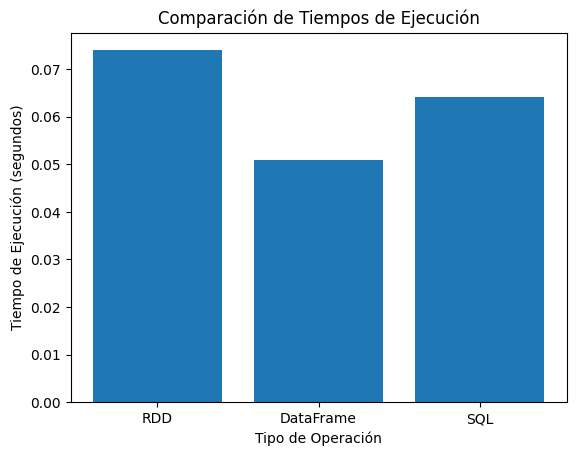

In [77]:
import matplotlib.pyplot as plt

# Crear gráfico
plt.bar(['RDD', 'DataFrame','SQL'], [tiempo_rdd, tiempo_df,tiempo_sql])
plt.title('Comparación de Tiempos de Ejecución')
plt.xlabel('Tipo de Operación')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()